<a href="https://colab.research.google.com/github/TarunChaubey/A/blob/master/iNeuron_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

1.Analyse the dataset and perform some basic EDA and pre-processing. Once EDA has done, plot a graph for performance metrics and obtain the best result.
2.The minimum r2 score should be 0.84. Along with this also consider the various other metrics such as RMSE, MAE, and MSE.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
sns.set_style('whitegrid')

In [2]:
from datetime import date
todays_date = date.today()

In [3]:
import scipy
from scipy.stats import zscore

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/otomoto_price_prediction_data.csv')
df.shape

(206207, 11)

In [7]:
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [8]:
df.isnull().sum()

make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2178
engine_power       1579
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

Null value in the form of percentage

In [9]:
df.isnull().sum()*100/df.shape[0]

make               0.000000
model              0.000000
vehicle_year       0.000000
mileage            0.656622
engine_capacity    1.056220
engine_power       0.765735
gearbox            0.661956
fuel_type          0.000000
damaged            0.000000
is_business        0.000000
target_price       0.000000
dtype: float64

In [10]:
df.dtypes

make                object
model               object
vehicle_year         int64
mileage            float64
engine_capacity    float64
engine_power       float64
gearbox             object
fuel_type           object
damaged              int64
is_business          int64
target_price       float64
dtype: object

Datasets consist of 206207*11 i.e 206207 row and 11 columns
in which columns named mileage,engine_capacity,engine_power,gearbox has some null value and data type of null columns are float64(mileage,engine_capacity,engine_power) and object respectively

In [11]:
df.describe()

,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price
count,206207.000000,2.048530e+05,204029.000000,204628.000000,206207.000000,206207.000000,2.062070e+05
mean,2012.313855,6.656787e+05,1865.096922,151.300301,0.038059,0.600038,6.273519e+04
std,6.453940,2.040768e+08,708.559717,76.915073,0.191339,0.489891,8.604596e+04
min,1917.000000,1.000000e+00,400.000000,1.000000,0.000000,0.000000,6.000000e+02
25%,2008.000000,4.500000e+04,1461.000000,105.000000,0.000000,0.000000,1.799900e+04
50%,2013.000000,1.378500e+05,1797.000000,136.000000,0.000000,1.000000,3.590000e+04
75%,2017.000000,1.990000e+05,1997.000000,170.000000,0.000000,1.000000,7.490000e+04
max,2021.000000,9.060612e+10,8400.000000,1500.000000,1.000000,1.000000,5.250000e+06


In [12]:
#To get only those columns from datasets which has some null value in columns
df.columns[df.isnull().any() == True]

Index(['mileage', 'engine_capacity', 'engine_power', 'gearbox'], dtype='object')

In [13]:
# To check unique element of null column
for col in df.columns[df.isnull().any()]:
  print(col,":\n",df[col].unique())

mileage :
 [153817. 115000. 299000. ... 170548.  44826. 250948.]
engine_capacity :
 [1984. 1390. 3600. ... 1111. 3986. 4638.]
engine_power :
 [1.800e+02 7.500e+01 3.230e+02 1.630e+02 1.300e+02 1.500e+02 1.700e+02
 1.010e+02 9.000e+01 1.400e+02 1.090e+02 1.050e+02 2.200e+02 8.800e+01
 2.520e+02 1.600e+02 2.330e+02 1.450e+02 1.320e+02 1.150e+02 3.600e+02
 6.800e+01 6.900e+01 1.560e+02 5.070e+02 2.310e+02 1.100e+02 1.650e+02
 1.360e+02 9.900e+01 1.000e+02 1.350e+02 8.500e+01 1.070e+02 1.550e+02
 6.000e+01 1.750e+02 1.900e+02 9.500e+01 5.000e+01 1.840e+02 2.540e+02
 6.500e+01 1.160e+02 2.000e+02 1.200e+02 2.770e+02 2.830e+02 9.200e+01
 5.800e+01 1.310e+02 2.580e+02 1.430e+02 1.790e+02 1.220e+02 1.280e+02
 1.520e+02 2.250e+02 1.250e+02 4.070e+02 2.720e+02 1.470e+02 1.110e+02
 1.770e+02 9.800e+01 2.450e+02 3.100e+02 1.210e+02 2.420e+02 1.910e+02
 2.040e+02 1.420e+02 1.170e+02 2.180e+02 9.600e+01 2.490e+02       nan
 1.120e+02 1.970e+02 1.410e+02 8.600e+01 3.740e+02 8.300e+01 2.650e+02
 1.020

In [14]:
#unique value of null columns
for col in df.columns[df.isnull().any()]:
  print(col,":\n",df[col].value_counts())

mileage :
 1.0         8712
5.0         7430
10.0        3189
2.0         1239
180000.0    1180
            ... 
170508.0       1
118020.0       1
25679.0        1
170502.0       1
156490.0       1
Name: mileage, Length: 51008, dtype: int64
engine_capacity :
 1598.0    14284
1968.0    12029
1995.0     9724
1997.0     8509
1998.0     8134
          ...  
903.0         1
6651.0        1
1301.0        1
5242.0        1
4952.0        1
Name: engine_capacity, Length: 1194, dtype: int64
engine_power :
 150.0     17399
140.0     11273
110.0      8000
115.0      7334
90.0       6933
          ...  
1140.0        1
488.0         1
728.0         1
369.0         1
1200.0        1
Name: engine_power, Length: 572, dtype: int64
gearbox :
 manual                           133598
automatic                         67034
dual-clutch                        2331
cvt                                1742
semi-automatic                       83
automatic-stepless                   31
automatic-sequential     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


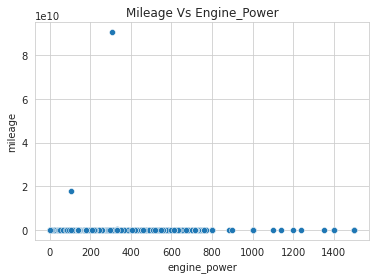

In [15]:
sns.scatterplot(df['engine_power'],df['mileage'])
plt.title('Mileage Vs Engine_Power')
plt.show()
# most of the vehicle mileage less than 2 and only few vehicle has more than 2 mileage and it suppose to be outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


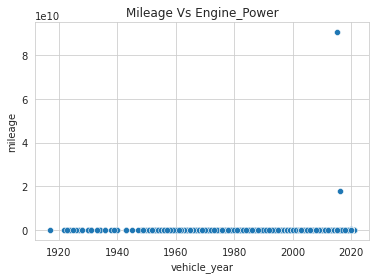

In [16]:
sns.scatterplot(df['vehicle_year'],df['mileage'])
plt.title('Mileage Vs Engine_Power')
plt.show()
# most of the vehicle mileage less than 2 and only few vehicle has more than 2 mileage and it suppose to be outliers

In [17]:
# Handle Missing Value
df['mileage'].fillna(df['mileage'].mean(),inplace = True)
df['engine_capacity'].fillna(df['engine_capacity'].mean(),inplace = True)
df['engine_power'].fillna(df['engine_power'].mean(),inplace = True)
df['gearbox'].fillna(f"{df['gearbox'].mode()}",inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


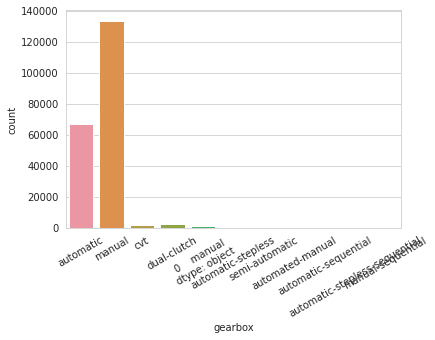

In [18]:
sns.countplot(df['gearbox'])
plt.xticks(rotation = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


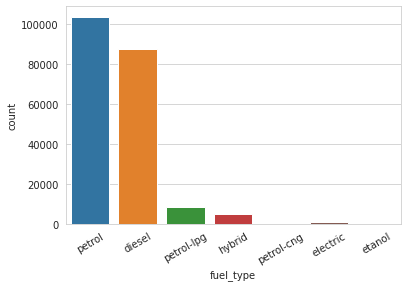

In [19]:
sns.countplot(df['fuel_type'])
plt.xticks(rotation = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


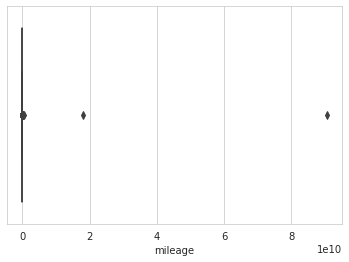

In [20]:
sns.boxplot(df['mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


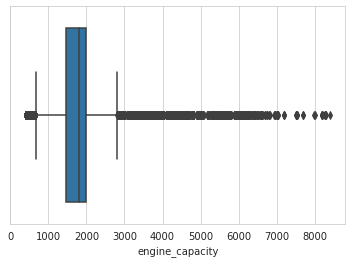

In [21]:
sns.boxplot(df['engine_capacity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


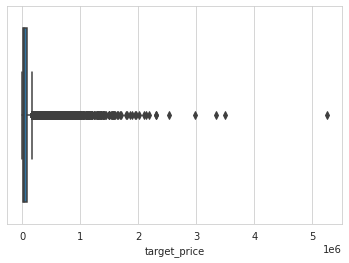

In [22]:
sns.boxplot(df['target_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


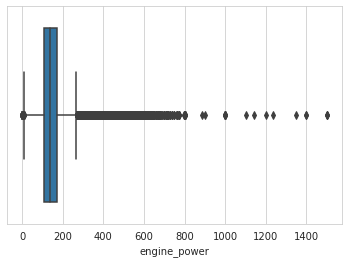

In [23]:
sns.boxplot(df['engine_power'])

In [24]:
# All Above 4 Graph show that ouliers exist

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Damaged')

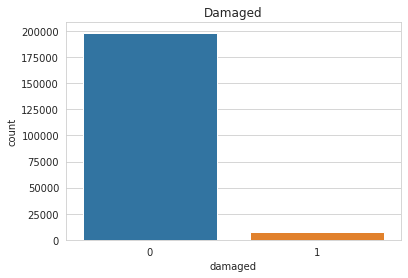

In [25]:
sns.countplot(df['damaged'])
plt.title('Damaged')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'is_business')

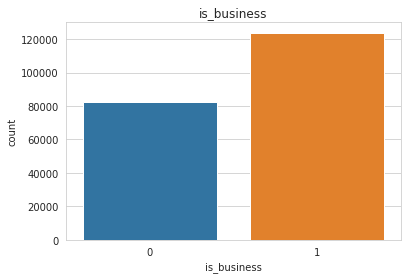

In [26]:
sns.countplot(df['is_business'])
plt.title('is_business')

In [27]:
#calculate Age of Vehicle by using vehicle_year columns
Age= []
for i in df['vehicle_year']:
  Age.append(todays_date.year-i)
df['Age_of_vehicle'] = Age

In [28]:
# droped columns vehicle_year after calculating Age_of_vehicle
df.drop('vehicle_year',axis = 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


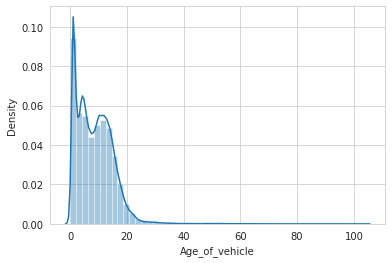

In [29]:
sns.distplot(df['Age_of_vehicle'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


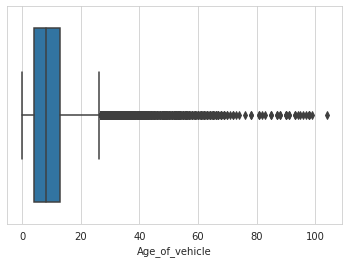

In [30]:
sns.boxplot(df['Age_of_vehicle'])
# it show that Age_of_vehicle columns data has some countlires

In [31]:
print("Mean: {}\nMedina: {}\nMode: {}".format(df['Age_of_vehicle'].mean(),df['Age_of_vehicle'].median(),df['Age_of_vehicle'].mode()))

Mean: 8.686145475177856
Medina: 8.0
Mode: 0    1
dtype: int64


In this case we can see that mean > medina > mode i.e Right Skwed/Positive Skwed

### Outliers Removal

In [32]:
df = df[zscore(df['Age_of_vehicle']) < 2]
df = df[zscore(df['engine_power']) < 3]

<function matplotlib.pyplot.show>

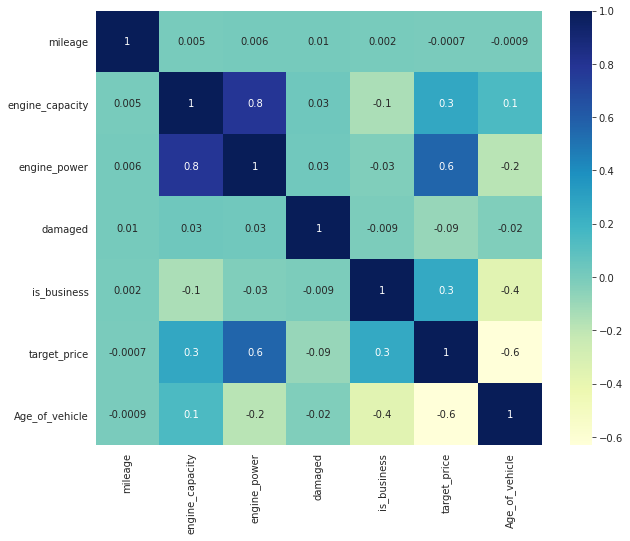

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='YlGnBu')
plt.show

<function matplotlib.pyplot.show>

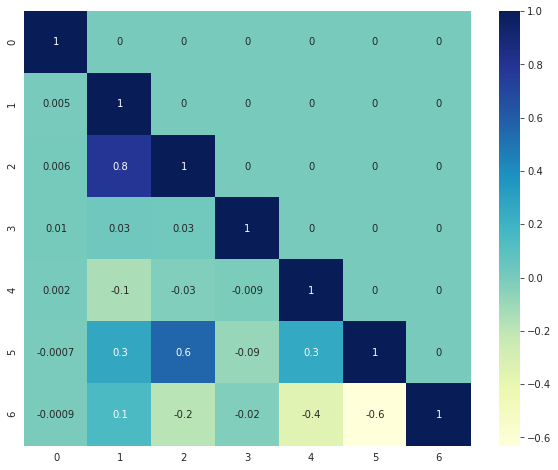

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(np.tril(df.corr()),annot=True,fmt='.1g',cmap='YlGnBu')
plt.show

In [35]:
for col in df.select_dtypes(include='object').columns:
  df[col] = LabelEncoder().fit_transform(df[col])

In [36]:
df.head()

,make,model,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price,Age_of_vehicle
0,5,83,153817.0,1984.0,180.0,2,4,0,0,69900.0,8
1,71,315,115000.0,1390.0,75.0,8,4,0,1,8299.0,17
2,14,178,299000.0,3600.0,323.0,2,4,0,1,54500.0,9
3,8,694,155000.0,1995.0,163.0,2,0,0,0,62000.0,8
4,64,759,167000.0,1600.0,130.0,2,0,0,1,52999.0,4


From datasets we can see that there huge difference in value of columns like mileage has four digit value while engine_capacity has 5 to 6 digit value that's why we need to normalize the dataset so our data become in one scale and no huge variance between vlaue of datatsets

## Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

In [38]:
y = df['target_price']

In [39]:
df = pd.DataFrame(norm.fit_transform(df.drop('target_price',axis=1)),columns=df.drop('target_price',axis=1).columns)
df.head()

,make,model,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,Age_of_vehicle
0,0.060241,0.093574,0.000002,0.200964,0.471053,0.2,0.666667,0.0,0.0,0.380952
1,0.855422,0.355130,0.000001,0.125603,0.194737,0.8,0.666667,0.0,1.0,0.809524
2,0.168675,0.200676,0.000003,0.405988,0.847368,0.2,0.666667,0.0,1.0,0.428571
3,0.096386,0.782413,0.000002,0.202360,0.426316,0.2,0.000000,0.0,0.0,0.380952
4,0.771084,0.855693,0.000002,0.152246,0.339474,0.2,0.000000,0.0,1.0,0.190476


Training

In [40]:
X = df.copy()
y = y.copy()

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42)

In [42]:
X_train.shape, X_test.shape

((147606, 10), (49202, 10))

In [43]:
y_train.shape,y_test.shape

((147606,), (49202,))

In [50]:
def Model_Name(model):
  model.fit(X_train,y_train)
  pred_y = model.predict(X_test).round(2)
  r=r2_score(y_test,pred_y).round(3)
  rmse = np.sqrt(mean_squared_error(y_test,pred_y)).round(3)
  mae = mean_absolute_error(y_test,pred_y).round(3) 

  return print("r2_Score: {} \nRMSE: {} \nMEA: {}".format(r,rmse,mae))

In [51]:
Model_Name(LinearRegression())

r2_Score: 0.618 
RMSE: 39477.199 
MEA: 23155.55


In [52]:
Model_Name(DecisionTreeRegressor())

r2_Score: 0.846 
RMSE: 25073.523 
MEA: 7744.458


In [53]:
Model_Name(RandomForestRegressor())

r2_Score: 0.895 
RMSE: 20670.639 
MEA: 6534.774


In [54]:
Model_Name(GradientBoostingRegressor())

r2_Score: 0.857 
RMSE: 24113.977 
MEA: 10300.534


In [55]:
Model_Name(LGBMRegressor())

r2_Score: 0.889 
RMSE: 21285.799 
MEA: 8067.524


**After Experiment and analysis With Multiple Algorithm i found that RandomForestRegressor and LGBMRegressor has more accuracy**



1.   RandomForestRegressor     
r2_score = .895


2.   LGBMRegressor
   r2_score = .889




